# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [426]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [427]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
def printTree(node, level=0):
    if node != None:
        printTree(node.right, level + 1)
        print(' ' * 4 * level + '-> ' + str(node.key))
        printTree(node.left, level + 1)


Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [428]:
class TwoThreeNode:
    def __init__(self, keys=None, children=None):
        self.keys = keys if keys is not None else []
        self.children = children if children is not None else []

    def isLeaf(self):
        return len(self.children) == 0


class TwoThreeTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None

    def insertElement(self, element):
        if self.root is None:
            self.root = TwoThreeNode([element])
            return True

        result = self._insert(self.root, element)
        if result is not None:
            promoted, leftChild, rightChild = result
            self.root = TwoThreeNode(keys=[promoted], children=[leftChild, rightChild])
        return True

    def _insert(self, node, element):
        """
        Recursively insert 'element' into the subtree rooted at 'node'.
        If a node overflow occurs, return a tuple (promoted, leftChild, rightChild);
        otherwise, return None.
        """

        if node.isLeaf():
            node.keys.append(element)
            node.keys.sort()
            if len(node.keys) <= 2:
                return None
            else:
                return self._split(node)
        else:
            if len(node.keys) == 1:
                if element < node.keys[0]:
                    i = 0
                else:
                    i = 1
            else:
                if element < node.keys[0]:
                    i = 0
                elif element < node.keys[1]:
                    i = 1
                else:
                    i = 2

            result = self._insert(node.children[i], element)

            if result is None:
                return None
            else:
                promoted, leftChild, rightChild = result
                pos = 0
                while pos < len(node.keys) and promoted > node.keys[pos]:
                    pos += 1
                node.keys.insert(pos, promoted)
                
                node.children.pop(i)
                node.children.insert(i, leftChild)
                node.children.insert(i + 1, rightChild)
                
                if len(node.keys) <= 2:
                    return None
                else:
                    return self._split(node)

    def _split(self, node):
        """
        Splits a node that has 3 keys (and 4 children if internal).
        Returns a tuple (promoted, leftChild, rightChild) where the middle key
        is promoted to the parent.
        """

        k0, k1, k2 = node.keys

        if node.isLeaf():
            left = TwoThreeNode([k0])
            right = TwoThreeNode([k2])
        else:
            left = TwoThreeNode([k0], node.children[:2])
            right = TwoThreeNode([k2], node.children[2:])
        return (k1, left, right)

    def searchElement(self, element):
        """
        Search for element in tree iteratively.
        Returns True if found, otherwise returns False.
        """

        node = self.root
        while node is not None:
            if element in node.keys:
                return True
            if node.isLeaf():
                return False

            if len(node.keys) == 1:
                if element < node.keys[0]:
                    node = node.children[0]
                else:
                    node = node.children[1]
            else:
                if element < node.keys[0]:
                    node = node.children[0]
                elif element < node.keys[1]:
                    node = node.children[1]
                else:
                    node = node.children[2]
        return False



Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [429]:
class AVLTree(AbstractSearchInterface):

    class Node:
        def __init__(self, key):
            self.key = key
            self.left = None
            self.right = None
            self.height = 1

    def __init__(self):
        self.root = None

    def get_height(self, node):
        if not node:
            return 0
        return node.height

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def rotateLeft(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2
        
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    def rotateRight(self, z):
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    def insert(self, root, key):
        if not root:
            return self.Node(key), True
        elif key < root.key:
            root.left, added = self.insert(root.left, key)
        elif key > root.key:
            root.right, added = self.insert(root.right, key)
        else:
            return root, False

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        balance = self.get_balance(root)

        # Left rotation
        if balance > 1 and key < root.left.key:
            return self.rotateRight(root), True

        # Right rotation
        if balance < -1 and key > root.right.key:
            return self.rotateLeft(root), True

        # Left-Right rotation
        if balance > 1 and key > root.left.key:
            root.left = self.rotateLeft(root.left)
            return self.rotateRight(root), True

        # Right-Left rotation
        if balance < -1 and key < root.right.key:
            root.right = self.rotateRight(root.right)
            return self.rotateLeft(root), True

        return root, added
        
    def insertElement(self, element):
        new_tree, added = self.insert(self.root, element)
        self.root = new_tree
        return added
    
    def search(self, root, element):
        if root is None:
            return False
        
        if root.key == element:
            return True
        
        if element < root.key and root.left:
            return self.search(root.left, element)
        elif root.right:
            return self.search(root.right, element)
        
        return False
    

    def searchElement(self, element):    
        return self.search(self.root, element)

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [430]:
class LLRBBST(AbstractSearchInterface):

    def __init__(self):
        self.root = None

    class Node:
        def __init__(self, value, colour=True):
            self.value = value
            self.left = None
            self.right = None
            self.colour = colour 
            # where True = red and False = black

    def rotate_left(self, node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = True
        return x

    def rotate_right(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = True
        return x

    def colour_flip(self, node):
        node.colour = True
        node.left.colour = False
        node.right.colour = False
        return node
    
    def _get(self, node, value):
        if node is None:
            return None
        
        # classic BST search
        if value < node.value:
            return self._get(node.left, value)
        elif value > node.value:
            return self._get(node.right, value)
        else:
            return node.value  

    def get(self, value):
        return self._get(self.root, value)

    def _set(self, node, value):
        if node is None:
            return self.Node(value, True)  
        
        # classic BST insert 
        if value < node.value:
            node.left = self._set(node.left, value)
        elif value > node.value:
            node.right = self._set(node.right, value)
        else:
            node.value = value

        # now balance the tree
        if node.right is not None and node.right.colour == True and (node.left is None or node.left.colour == False):
            node = self.rotate_left(node)
        if node.left is not None and node.left.colour == True and node.left.left is not None and node.left.left.colour == True:
            node = self.rotate_right(node)
        if node.left is not None and node.left.colour == True and node.right is not None and node.right.colour == True:
            node = self.colour_flip(node)

        return node
        
    def set(self, value):
        self.root = self._set(self.root, value)
        self.root.colour = False  # root is always black
 
    def insertElement(self, element):

        # element already exists
        if self.get(element) is not None:
            return False  

        # insert the element
        self.set(element)
        return True

    def searchElement(self, element):

        return self.get(element) is not None
    



tree = LLRBBST()
tree.insertElement("hello")
tree.insertElement("why")
print(tree.searchElement("hello"))
print(tree.searchElement("no"))

True
False


Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [431]:
class BTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [432]:
class ScapegoatTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [433]:
import string
import random

class TestDataGenerator():
    def generate_string(self, length):
        return ''.join(random.choices(string.ascii_letters + string.digits, k=length))
    
    def generate_data(self, numOfElements, minLength = 10, maxLength = 20):
        testData = []
        for i in range(numOfElements):
            length = random.randint(minLength, maxLength)
            testData.append(self.generate_string(length))
        return testData
    
    # Generate a list of sorted random strings.
    def generate_sorted_data(self, num_of_elements, min_length=10, max_length=20):
            test_data = self.generate_data(num_of_elements, min_length, max_length)
            return sorted(test_data)
    
    # Generate a list of reverse sorted random strings.
    def generate_reverse_sorted_data(self, num_of_elements, min_length=10, max_length=20):
        test_data = self.generate_data(num_of_elements, min_length, max_length)
        return sorted(test_data, reverse=True)
    
    # Generate a list of random strings with a specified ratio of duplicates.
    def generate_duplicates_data(self, num_of_elements, min_length=10, max_length=20, duplicate_ratio=0.1):
        unique_data = self.generate_data(int(num_of_elements * (1 - duplicate_ratio)), min_length, max_length)
        duplicates = random.choices(unique_data, k=int(num_of_elements * duplicate_ratio))
        return unique_data + duplicates
    
    # Generate a list of random strings with a fixed length.
    def generate_fixed_length_data(self, num_of_elements, fixed_length=15):
        return [self.generate_string(fixed_length) for _ in range(num_of_elements)]

    
    # Generate a list of sorted random strings.
    def generate_sorted_data(self, num_of_elements, min_length=10, max_length=20):
            test_data = self.generate_data(num_of_elements, min_length, max_length)
            return sorted(test_data)
    
    # Generate a list of reverse sorted random strings.
    def generate_reverse_sorted_data(self, num_of_elements, min_length=10, max_length=20):
        test_data = self.generate_data(num_of_elements, min_length, max_length)
        return sorted(test_data, reverse=True)
    
    # Generate a list of random strings with a specified ratio of duplicates.
    def generate_duplicates_data(self, num_of_elements, min_length=10, max_length=20, duplicate_ratio=0.1):
        unique_data = self.generate_data(int(num_of_elements * (1 - duplicate_ratio)), min_length, max_length)
        duplicates = random.choices(unique_data, k=int(num_of_elements * duplicate_ratio))
        return unique_data + duplicates
    
    # Generate a list of random strings with a fixed length.
    def generate_fixed_length_data(self, num_of_elements, fixed_length=15):
        return [self.generate_string(fixed_length) for _ in range(num_of_elements)]
    
    

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [434]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    def runExperiment(self, dataStructure, testData, operation):
        if operation == "insert":
            def experiment():
                for data in testData:
                    dataStructure.insertElement(data)
        elif operation == "search":
            def experiment():
                for data in testData:
                    dataStructure.searchElement(data)
        else:
            raise ValueError("Invalid operation. Use 'insert' or 'search'.")
        
        time = timeit.timeit(experiment, number=1)
        return time

    def evaluateExperiment(self, dataStructures, dataSetSizes, operation):
            generator = TestDataGenerator()
            results = {ds.__class__.__name__: [] for ds in dataStructures}
            #testData = generator.generate_data(5000)
            for size in dataSetSizes:
                testData = generator.generate_fixed_length_data(size)
                for ds in dataStructures:
                    tree = ds.__class__()
                    time = self.runExperiment(tree, testData, operation)
                    results[ds.__class__.__name__].append(time / size)
                    print(f"{ds.__class__.__name__} - {operation} - Dataset size {size}: {time:.6f} seconds")
            return results
   
    def plotGraph(self, results, dataSetSizes, operation):
        plt.figure(figsize=(10, 6))
        for ds_name, times in results.items():
            plt.plot(dataSetSizes, times, label=ds_name)

        plt.title(f"Performance Comparison: {operation.capitalize()} Operation")
        plt.xlabel("Dataset Size")
        plt.ylabel("Execution Time (seconds)")
        plt.legend()
        plt.grid(True)
        plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

TwoThreeTree - insert - Dataset size 10000: 0.071896 seconds
AVLTree - insert - Dataset size 10000: 0.094770 seconds
LLRBBST - insert - Dataset size 10000: 0.051367 seconds
TwoThreeTree - insert - Dataset size 10100: 0.040003 seconds
AVLTree - insert - Dataset size 10100: 0.107022 seconds
LLRBBST - insert - Dataset size 10100: 0.063948 seconds
TwoThreeTree - insert - Dataset size 10200: 0.047847 seconds
AVLTree - insert - Dataset size 10200: 0.106508 seconds
LLRBBST - insert - Dataset size 10200: 0.053421 seconds
TwoThreeTree - insert - Dataset size 10300: 0.044626 seconds
AVLTree - insert - Dataset size 10300: 0.112604 seconds
LLRBBST - insert - Dataset size 10300: 0.061176 seconds
TwoThreeTree - insert - Dataset size 10400: 0.044753 seconds
AVLTree - insert - Dataset size 10400: 0.103709 seconds
LLRBBST - insert - Dataset size 10400: 0.052454 seconds
TwoThreeTree - insert - Dataset size 10500: 0.039084 seconds
AVLTree - insert - Dataset size 10500: 0.094157 seconds
LLRBBST - insert -

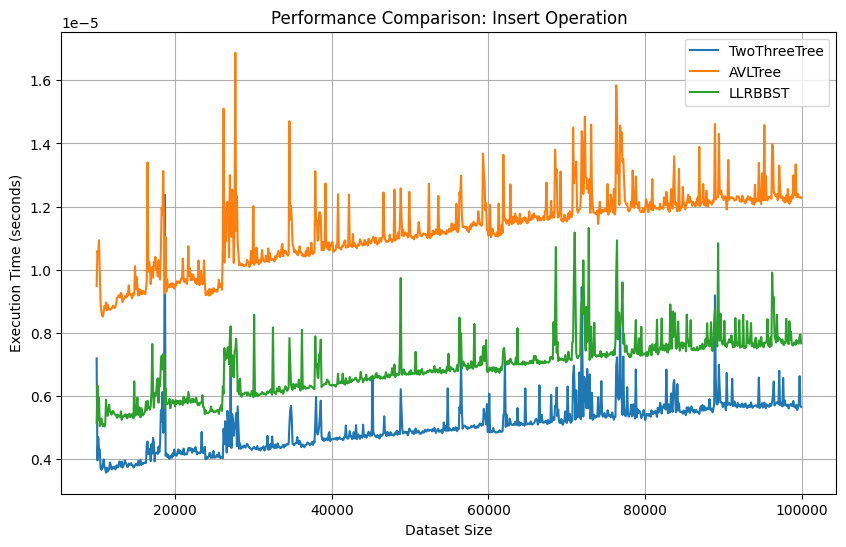

In [435]:
# ADD YOUR TEST CODE HERE 

generator = TestDataGenerator()
framework = ExperimentalFramework()

TwoThree = TwoThreeTree()
AVL = AVLTree()
LLRB = LLRBBST()

data_structures = [TwoThree, AVL, LLRB]

sizes = list(range(10000, 10**5, 100))
results = framework.evaluateExperiment(data_structures, sizes, operation="insert")
framework.plotGraph(results, sizes, operation="insert")

